In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches
from scipy.io import loadmat
from matplotlib.colors import ListedColormap

In [10]:
path = os.path.abspath('../../../1_Simulation_Results/numpy_files/')

colormap_data = loadmat('../cold2hot.mat')
cold2hot = ListedColormap(colormap_data['colormap'])
hot2cold = ListedColormap(colormap_data['colormap'][::-1])

In [4]:
model_Gaussian = np.load(path+'/Gaussian/TDB/Gaussian_TDB.npz')

LIQ_GT     = model_Gaussian['arr1']
FCC_GT     = model_Gaussian['arr2']
vel_GT     = model_Gaussian['arr3']
temp_GT    = model_Gaussian['arr4']
timeS_GT  = model_Gaussian['arr5']

time_steps =  timeS_GT.shape[0]

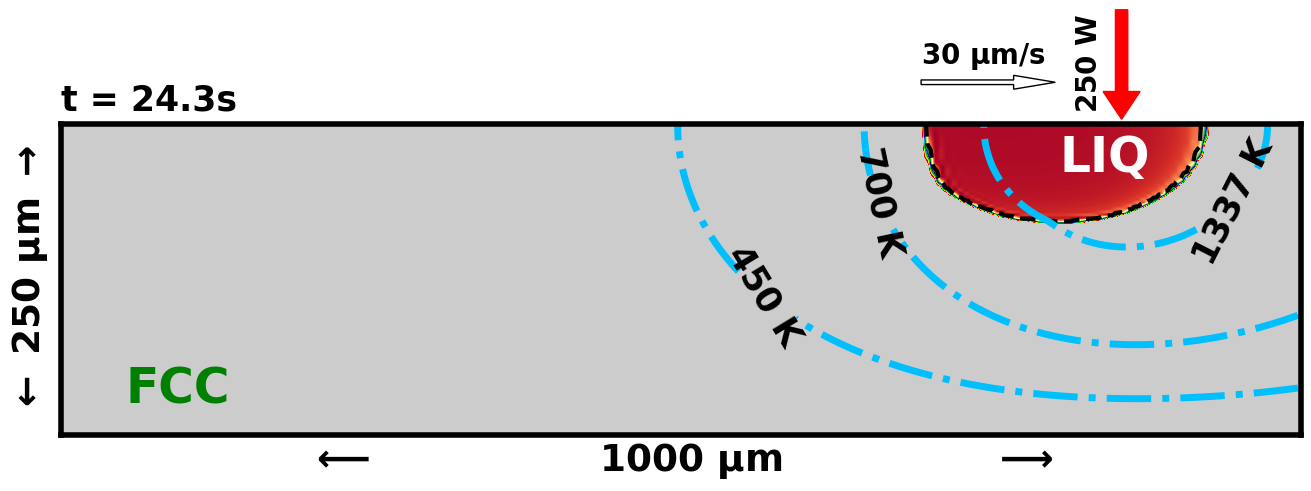

In [257]:
t_step = 440

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_GT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=True)
ax1.set_facecolor((0, 0, 0, 0))

cmap = plt.get_cmap('RdYlGn_r')
cmap.set_under('white', alpha=0)
hmap1 = ax1.imshow(LIQ_GT[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.0, aspect=0.5,  interpolation='quadric')

cmap = plt.get_cmap('nipy_spectral')
# cmap = cold2hot
cmap.set_under('white', alpha=0) 
hmap2 = ax1.imshow(FCC_GT[:,:,t_step], cmap=cmap, vmin=0.5, vmax=0.8, aspect=0.5, interpolation='quadric')

contour_level_LIQ = [0.8]
contour_LIQ = plt.contour(LIQ_GT[:, :, t_step], levels=contour_level_LIQ, colors='k', linestyles='--', linewidths=3,)

contour_levels = [450, 700,  1337]
contour = ax1.contour(temp_GT[:, :, t_step], levels=contour_levels, colors='deepskyblue', linewidths=5, linestyles='dashdot')
clabels = ax1.clabel(contour, inline=True, fontsize=25, colors='k', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')
    
if timeS_GT[t_step] < 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_GT[t_step]:.1f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_GT[t_step]:.1f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off

    
AuFCC_txt = ax1.text(20,180,'FCC', fontsize = 35, weight='bold', color='green')
AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')


ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
# ax1.add_patch(patches.Rectangle((-1, -1), 402, 202, linewidth=4, edgecolor='k', facecolor='none'))

plt.show()